         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

         diabetes         age  
count  392.000000  392.000000  
mean     0.523046   30.864796  
std      0.345488   10.200777  
min      0.085000   21.000000  
25%      0.269750   23.000000  
50%      0.449500   27.000000  
75%      0.687000   36.000000  
max      2.420

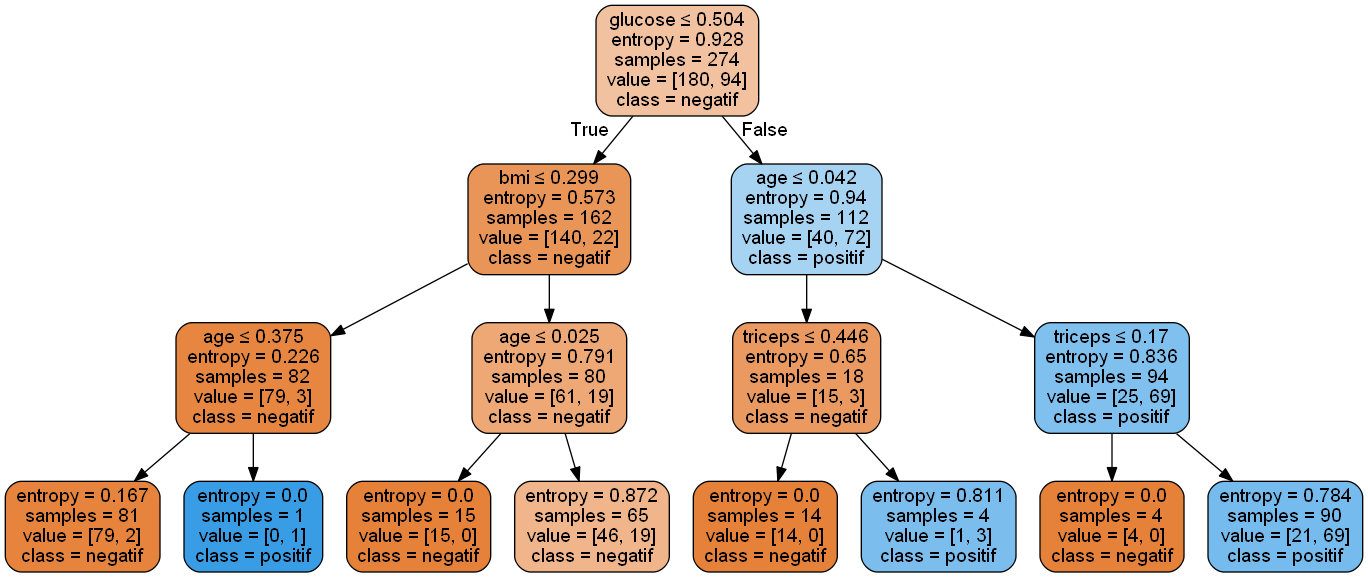

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#import dataset
data = pd.read_csv("PimaIndians.csv")
print (data.describe())
print (data.head())
print (data.tail())
data.rename(columns={'test': 'kelas'}, inplace=True)
positif = data[data.kelas == "positif"]
negatif = data[data.kelas == "negatif"]
print (plt.show())
data.kelas = [1 if each == "positif" else 0 for each in data.kelas]
y = data.kelas.values
x_ = data.drop(["kelas"],axis=1)
x = (x_ - np.min(x_))/(np.max(x_)-np.min(x_)).values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state =1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

#Predict the response for test dataset
predicted_y = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Akurasinya :",metrics.accuracy_score(y_test, predicted_y))

feature_cols = ['pregnant','glucose','diastolic','triceps','insulin','bmi','diabetes', 'age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['negatif','positif'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('PimaIndians.png')
Image(graph.create_png())